In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Загрузка данных

In [2]:
points = np.random.uniform(0, 100, size=(100000, 3))
np.savetxt("synthetic_cloud.xyz", points)

## Выделение области по координатным границам (Bounding Box)

In [3]:
def filter_by_bbox(points, xmin, xmax, ymin, ymax, zmin, zmax):
    mask = (
        (points[:, 0] >= xmin) & (points[:, 0] <= xmax) &
        (points[:, 1] >= ymin) & (points[:, 1] <= ymax) &
        (points[:, 2] >= zmin) & (points[:, 2] <= zmax)
    )
    return points[mask]

In [4]:
filtered = filter_by_bbox(points, 20, 50, 30, 70, 10, 40)

## Выделение по высоте (например, только "высокие" точки)

In [5]:
high_points = points[points[:, 2] > 80]

## Выделение по расстоянию до заданной точки

In [6]:
def filter_by_distance(points, center, radius):
    distances = np.linalg.norm(points - center, axis=1)
    return points[distances <= radius]

In [8]:
near_center = filter_by_distance(points, center=np.array([50, 50, 50]), radius=10)

In [15]:
np.savetxt("bbox_filtered.xyz", filtered)
np.savetxt("high_points.xyz", high_points)
np.savetxt("near_center.xyz", near_center)

## Визуализация

In [11]:
def show_cloud(points, title="Point Cloud"):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=0.3)
    ax.set_title(title)
    plt.show()

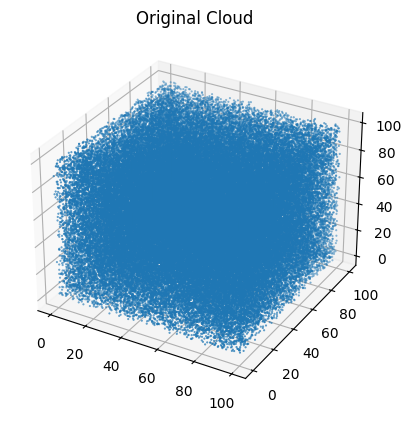

In [17]:
show_cloud(points, "Original Cloud")

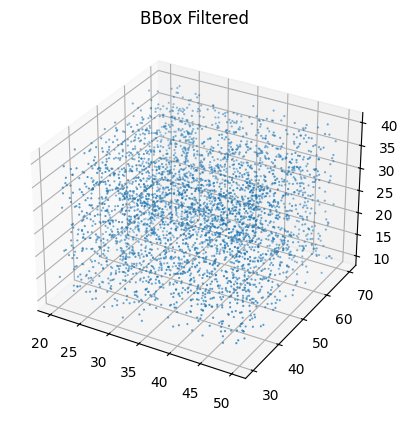

In [18]:
show_cloud(filtered, "BBox Filtered")

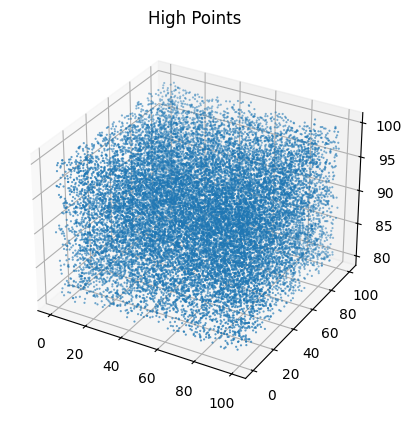

In [19]:
show_cloud(high_points, "High Points")

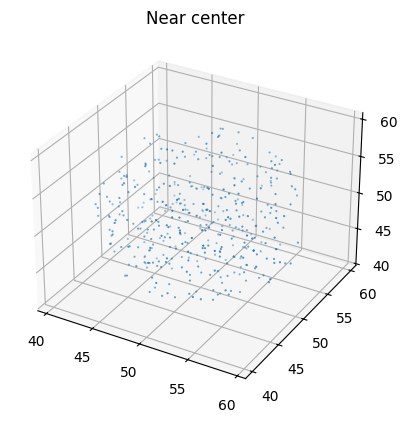

In [20]:
show_cloud(near_center, "Near center")

In [14]:
points.shape, filtered.shape, high_points.shape, near_center.shape

((100000, 3), (3641, 3), (20094, 3), (420, 3))